In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

# Set random seed for reproducibility
random.seed(9)
np.random.seed(9)

def generate_random_grid(grid_size, entropy):
    threshold = 0.5 * (1 + entropy)
    grid = np.random.rand(grid_size, grid_size) < threshold
    return grid.astype(int)

def CID(data):
    dictionary = {'0': 1, '1': 2}
    code = 3
    result = []
    buffer = ''
    total_compressed_bits = 0
    current_bit_size = math.floor(1 + math.log2(code))

    for bit in data:
        bit = str(bit)
        symbol = buffer + bit
        if symbol in dictionary:
            buffer = symbol
        else:
            result.append(dictionary[buffer])
            total_compressed_bits += current_bit_size

            dictionary[symbol] = code
            code += 1
            if code > 2 ** current_bit_size:
                current_bit_size += 1
            buffer = bit
    if buffer:
        result.append(dictionary[buffer])
        total_compressed_bits += current_bit_size

    original_bits = len(data)
    ratio = total_compressed_bits / original_bits
    return ratio

def generate_voxel_grid(grid, numGenerations):
    gridSize = grid.shape[0]
    voxel_grid = np.zeros((gridSize, gridSize, numGenerations))

    for t in range(numGenerations):
        newGrid = np.zeros((gridSize, gridSize))
        
        for i in range(gridSize):
            for j in range(gridSize):
                iMin = max(0, i-1)
                iMax = min(gridSize-1, i+1)
                jMin = max(0, j-1)
                jMax = min(gridSize-1, j+1)
                liveNeighbors = np.sum(grid[iMin:iMax+1, jMin:jMax+1]) - grid[i, j]
                if grid[i, j] == 1 and (liveNeighbors < 2 or liveNeighbors > 3):
                    newGrid[i, j] = 0
                elif grid[i, j] == 0 and liveNeighbors == 3:
                    newGrid[i, j] = 1
                else:
                    newGrid[i, j] = grid[i, j]
        grid = newGrid
        voxel_grid[:, :, t] = grid
    return voxel_grid

# Parameters
grid_size = 30
numGenerations = 30
num_ICs = 1000

data = []
point_sizes = {}

for ii in range(num_ICs):
    entropy = random.random()
    initial_grid = generate_random_grid(grid_size, entropy)
    flattened_IC = initial_grid.flatten()
    CID_value = CID(flattened_IC)
    
    voxel_grid = generate_voxel_grid(initial_grid, numGenerations)
    num_voxels = np.sum(voxel_grid)
    
    data.append({'CID': CID_value, 'VoxelCount': num_voxels})
    point = (CID_value, num_voxels)
    if point in point_sizes:
        point_sizes[point] += 1
    else:
        point_sizes[point] = 1
    if ii % 10 == 0:
        print(f'Processing point {ii}')

# Convert to pandas dataframe
df = pd.DataFrame(data)

# Sort data by CID
df.sort_values(by='CID', inplace=True)


Processing point 0
Processing point 10
Processing point 20
Processing point 30
Processing point 40
Processing point 50
Processing point 60
Processing point 70
Processing point 80
Processing point 90
Processing point 100
Processing point 110
Processing point 120
Processing point 130
Processing point 140
Processing point 150
Processing point 160
Processing point 170
Processing point 180
Processing point 190
Processing point 200
Processing point 210
Processing point 220
Processing point 230
Processing point 240
Processing point 250
Processing point 260
Processing point 270
Processing point 280
Processing point 290
Processing point 300
Processing point 310
Processing point 320
Processing point 330
Processing point 340
Processing point 350
Processing point 360
Processing point 370
Processing point 380
Processing point 390
Processing point 400
Processing point 410
Processing point 420
Processing point 430
Processing point 440
Processing point 450
Processing point 460
Processing point 470
Pro

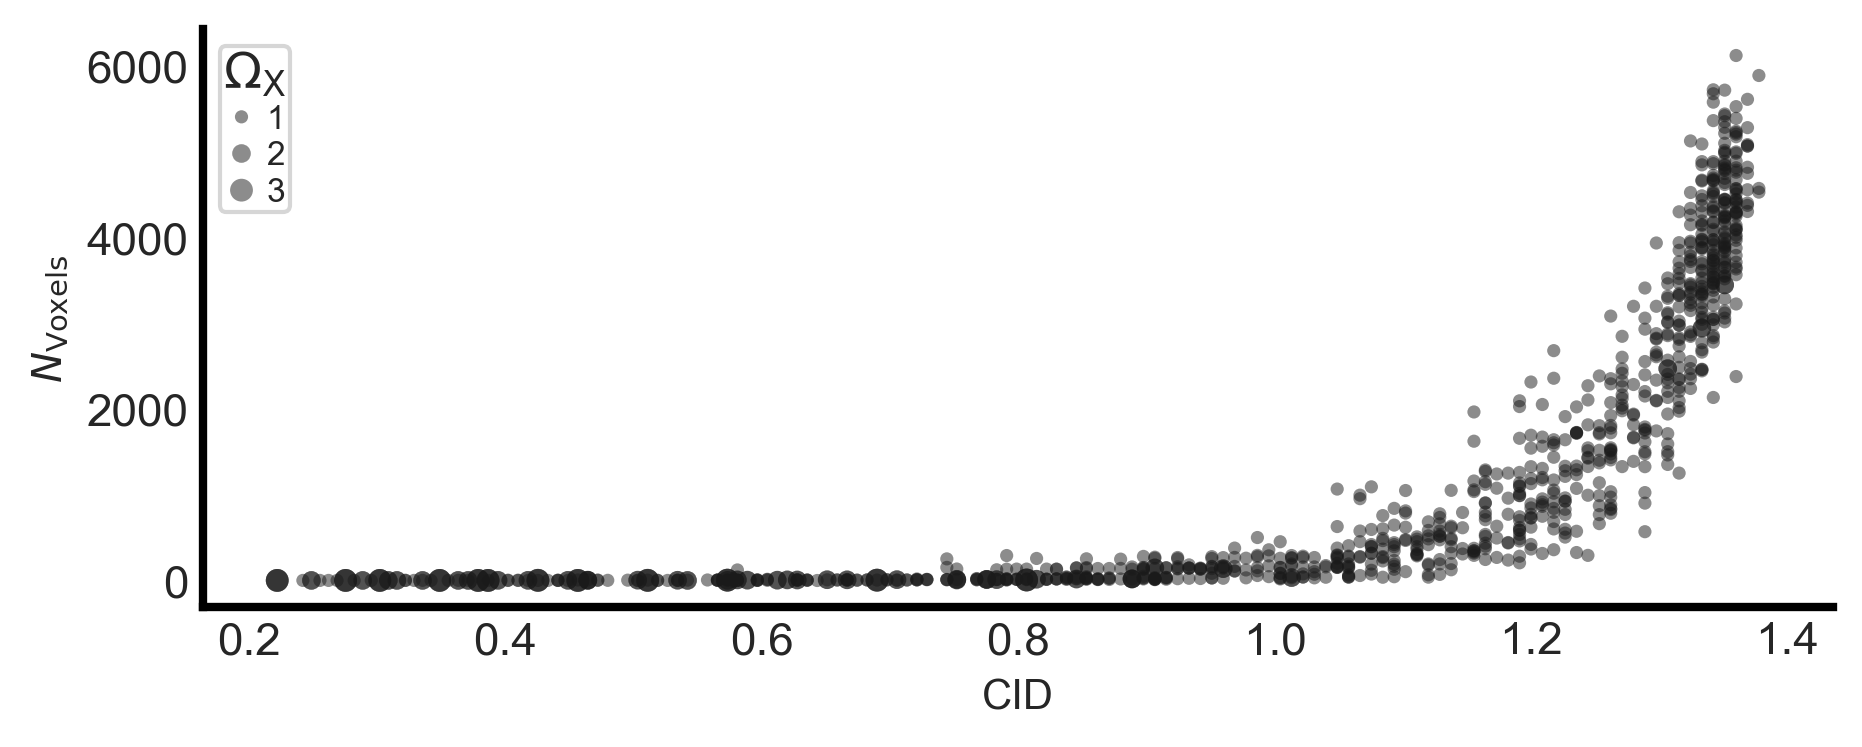

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_results(df, point_sizes):
    bubble_scale = 10
    # Set seaborn style
    sns.set(style="white")
    
    plt.figure(figsize=(7.01, 2.5), dpi=300)
    plt.tick_params(direction='in', left=True, bottom=True)

    # Scatter plot with bubble sizes indicating degeneracy
    plt.scatter(df['CID'], df['VoxelCount'], alpha=0.5, 
                s=[point_sizes[(row['CID'], row['VoxelCount'])] * bubble_scale for idx, row in df.iterrows()], 
                color='k', edgecolors='none')

    # Formatting the spines and removing unnecessary ones
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)

    # Remove tick marks
    ax.tick_params(left=False, bottom=False)

    plt.xlabel('CID', fontsize=10)
    plt.ylabel('$N_{\\mathrm{Voxels}}$', fontsize=10)

    # Create a legend for bubble sizes
    unique_sizes = np.unique([point_sizes[(row['CID'], row['VoxelCount'])] for idx, row in df.iterrows()])
    handles = [plt.scatter([], [], s=size * bubble_scale, color='k', alpha=0.5, edgecolor='none') for size in unique_sizes]
    size_labels = [f'{size}' for size in unique_sizes]
    
    # Add legend with tighter spacing
    plt.legend(
        handles, 
        size_labels,
        ncols=1,
        loc="upper left", 
        title=r"$\Omega_{\mathrm{X}}$", 
        fontsize=8, 
        labelspacing=0.1,  # Reduce spacing between legend labels
        handleheight=1,  # Reduce the height of the handles
        handlelength=1.0,  # Reduce the length of the legend handles
        handletextpad=.25, # Reduce the space between the handle and the text
        borderpad=0.1      # Reduce the padding inside the legend box
    )
    
    plt.show()
    

# Plot the results
plot_results(df, point_sizes)


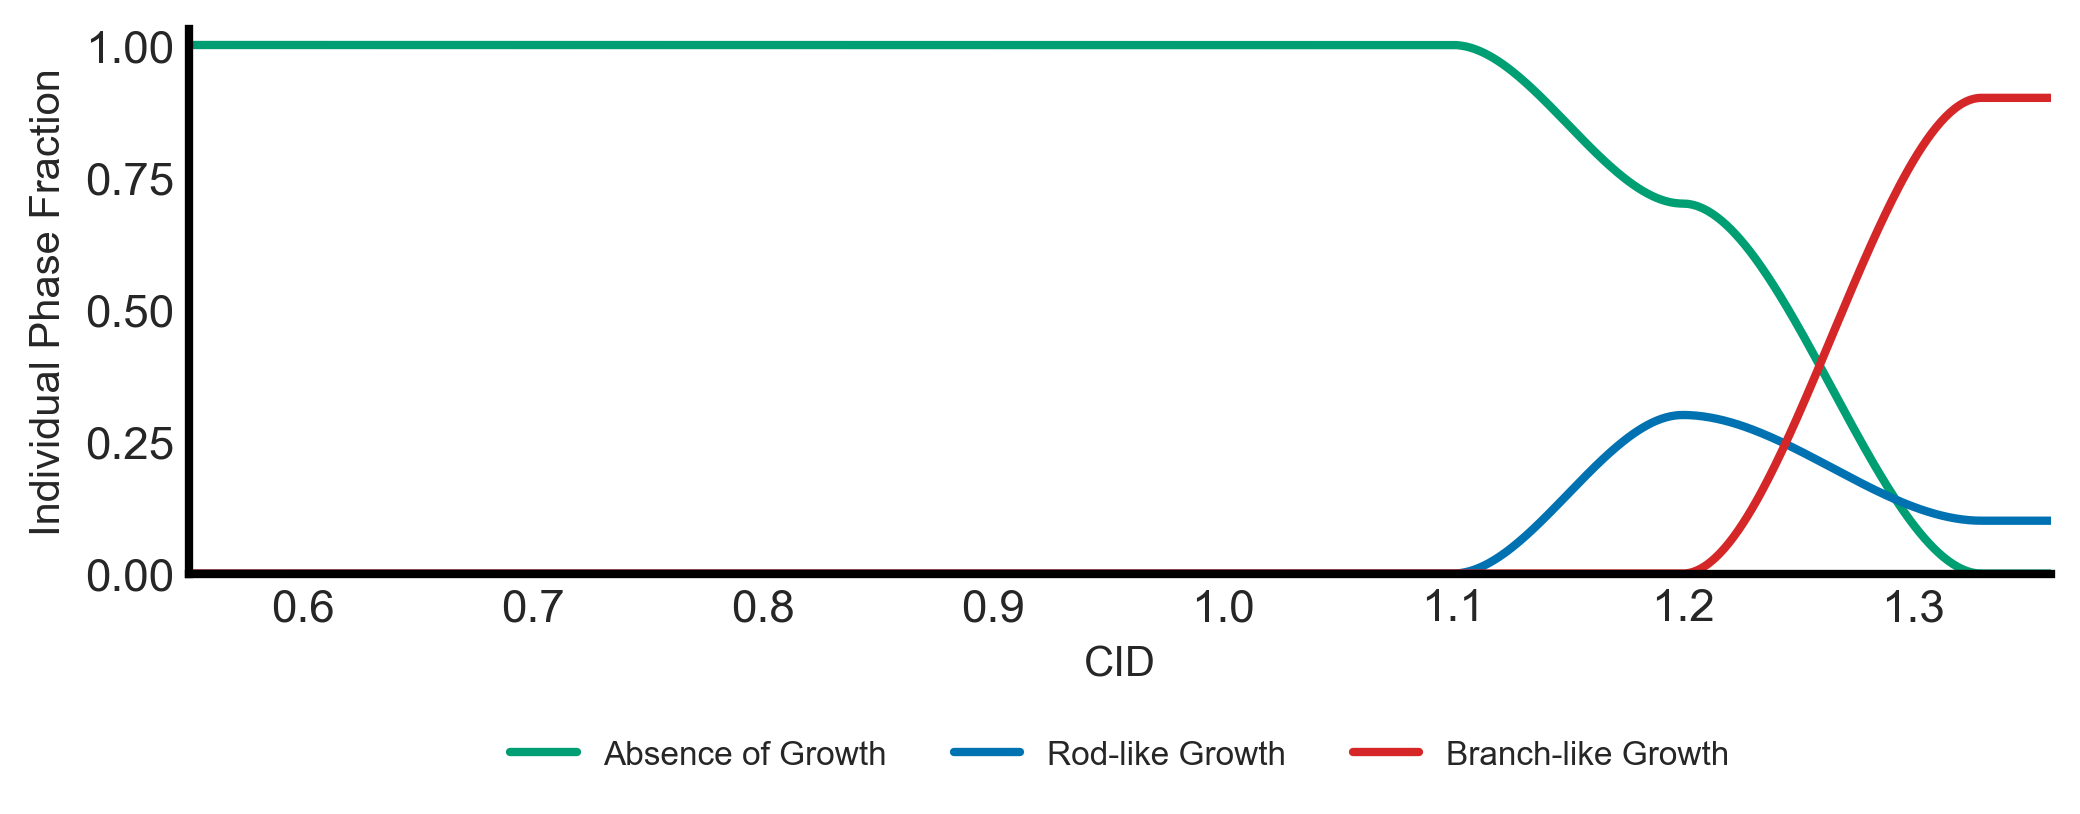

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ── figure set-up ──────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(7.01, 3), dpi=300)

# CID domain
x = np.linspace(0.55, 1.36, 800)

# smooth-step helper (C¹ continuous S-curve)
def smooth(t):            # t in [0,1]
    return 3*t**2 - 2*t**3

# initialise arrays
green = np.zeros_like(x)   # “Absence of Growth”   (was pink)
blue  = np.zeros_like(x)   # “Rod-like Growth”
red   = np.zeros_like(x)   # “Branch-like Growth”

# ── region 1: 0.55 – 1.10  → 100 % green ──────────────────────
m1 = x <= 1.10
green[m1] = 1.0

# ── region 2: 1.10 – 1.20  → blue rises to 0.30 smoothly ─────
m2 = (x > 1.10) & (x <= 1.20)
t2 = smooth((x[m2] - 1.10) / 0.10)          # 0 → 1
blue[m2]  = 0.30 * t2                       # 0 → 0.30
green[m2] = 1.0 - blue[m2]                  # keeps sum = 1

# ── region 3: 1.20 – 1.33  → red↑ to 0.90, blue↓ to 0.10 ─────
m3 = (x > 1.20) & (x <= 1.33)
t3 = smooth((x[m3] - 1.20) / 0.13)          # 0 → 1 on 1.20–1.33
red[m3]   = 0.90 * t3                       # 0 → 0.90
blue[m3]  = 0.30 - 0.20 * t3                # 0.30 → 0.10
green[m3] = 1.0 - red[m3] - blue[m3]        # smoothly to zero

# ── region 4:  >1.33       → green stays 0, blue 0.10, red 0.90
m4 = x > 1.33
red[m4]  = 0.90
blue[m4] = 0.10
# green already 0

# ── plot lines ────────────────────────────────────────────────
ax.plot(x, green, color='#009E73', lw=2, label='Absence of Growth')  # green
ax.plot(x, blue,  color='#0072B2', lw=2, label='Rod-like Growth')    # blue
ax.plot(x, red,   color='#D62728', lw=2, label='Branch-like Growth') # red

# ── axes formatting ────────────────────────────────────────────
ax.set_xlim(0.55, 1.36)
ax.set_ylim(0.0, 1.03)
ax.set_xlabel('CID', fontsize=10)
ax.set_ylabel('Individual Phase Fraction', fontsize=10)

# tidy spines
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_edgecolor('black')
    ax.spines[side].set_linewidth(2)

ax.tick_params(direction='in', left=True, bottom=True)

ax.legend(frameon=False, fontsize=8, ncol=3, loc='upper center',
          bbox_to_anchor=(0.5, -0.25))

ax.tick_params(left=False, bottom=False)


plt.tight_layout()
plt.show()


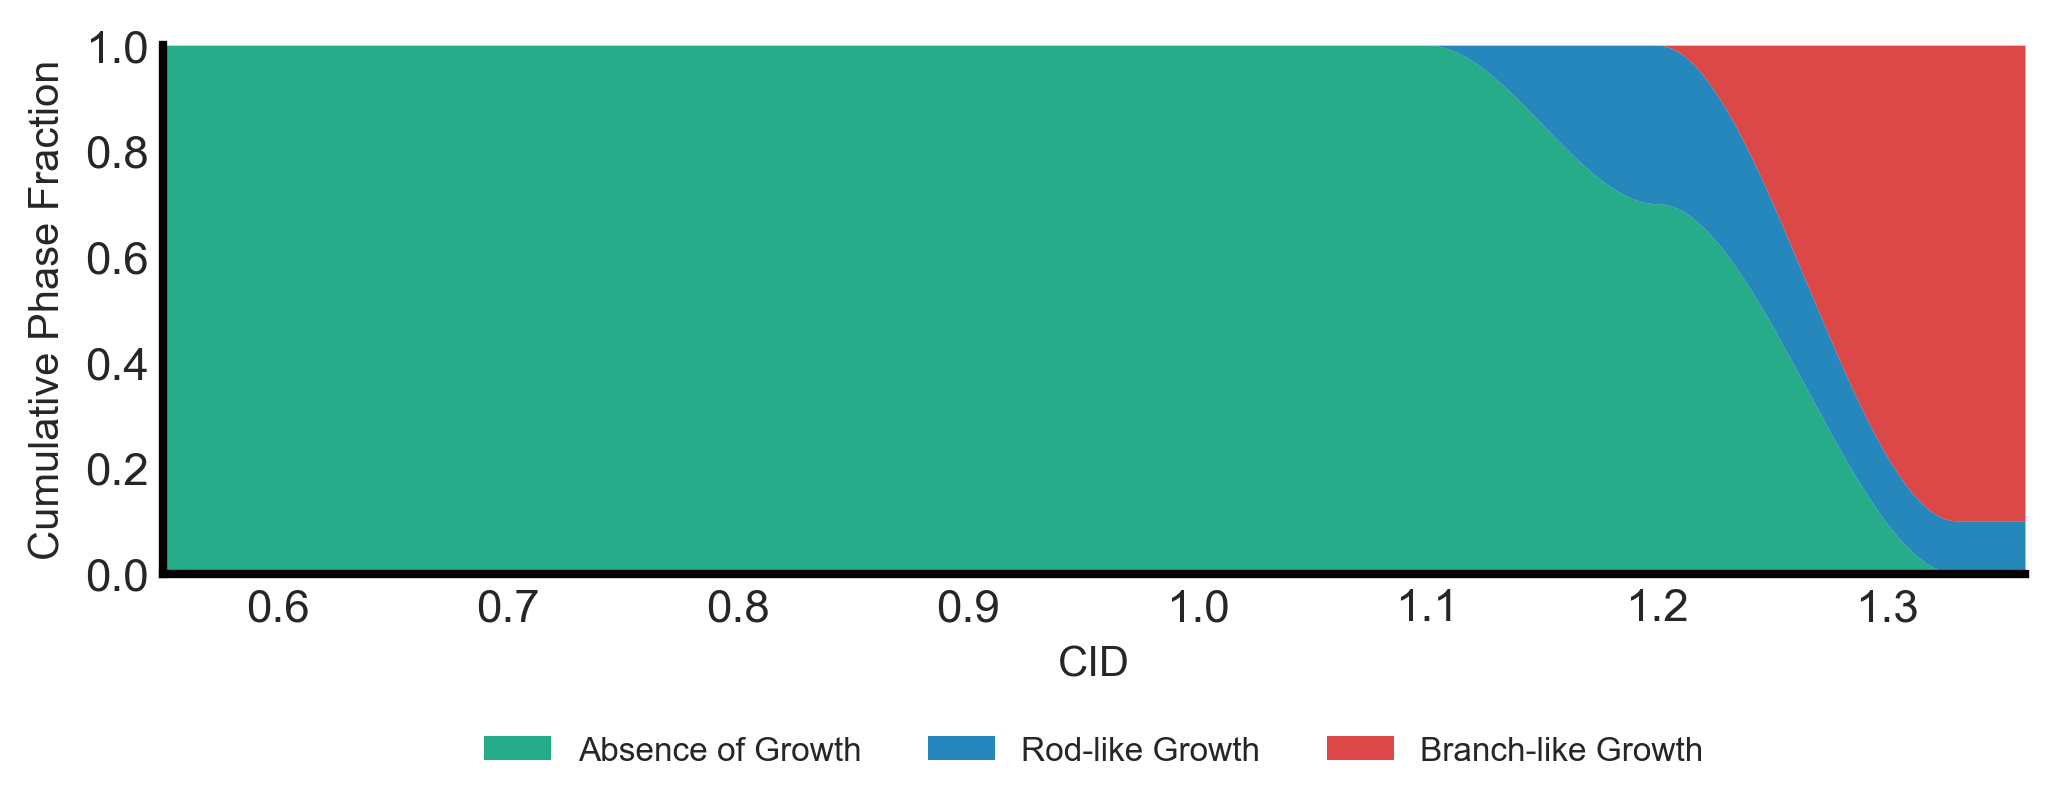

In [25]:
# ── PHASE-DIAGRAM FIGURE ───────────────────────────────────────
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.01, 3), dpi=300)

# stacked area plot
ax.stackplot(x,
             green, blue, red,
             colors=['#009E73', '#0072B2', '#D62728'],
             labels=['Absence of Growth', 'Rod-like Growth', 'Branch-like Growth'],
             alpha=0.85, linewidth=0)

# axes limits & labels
ax.set_xlim(0.55, 1.36)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('CID', fontsize=10)
ax.set_ylabel('Cumulative Phase Fraction', fontsize=10)

# neat spines
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
for side in ['left', 'bottom']:
    ax.spines[side].set_edgecolor('black'); ax.spines[side].set_linewidth(2)

ax.tick_params(direction='in', left=True, bottom=True)

ax.legend(frameon=False, fontsize=8, ncol=3,
          loc='upper center', bbox_to_anchor=(0.5, -0.25))

ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()
